In [701]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf
from pathlib import Path

%matplotlib inline

In [702]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print('Using GPU1')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print('Using CPU')

Using CPU


In [703]:
results_path = Path('results', 'time_series')
if not results_path.exists():
    results_path.mkdir(parents=True)

In [704]:
dataset = pd.read_csv("Fraudulent_E-Commerce_Transaction_Data.csv", sep=",")

In [705]:
dataset.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [706]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1472952 non-null  object 
 1   Customer ID         1472952 non-null  object 
 2   Transaction Amount  1472952 non-null  float64
 3   Transaction Date    1472952 non-null  object 
 4   Payment Method      1472952 non-null  object 
 5   Product Category    1472952 non-null  object 
 6   Quantity            1472952 non-null  int64  
 7   Customer Age        1472952 non-null  int64  
 8   Customer Location   1472952 non-null  object 
 9   Device Used         1472952 non-null  object 
 10  IP Address          1472952 non-null  object 
 11  Shipping Address    1472952 non-null  object 
 12  Billing Address     1472952 non-null  object 
 13  Is Fraudulent       1472952 non-null  int64  
 14  Account Age Days    1472952 non-null  int64  
 15  Transaction Hou

In [707]:
dataset.shape

(1472952, 16)

In [708]:
dataset.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')

In [709]:
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

In [710]:
# Ahora que tenemos las columnas que tienen datos perdidos mostraremos el porcentage de datos perdidos que tienen

miss = dataset.isnull().sum()/len(dataset)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Series([], dtype: float64)

In [711]:
# Comprobaremos si el dataset si tiene datos duplicados

data_duplicated = dataset[dataset.duplicated()]

print(data_duplicated)

Empty DataFrame
Columns: [Transaction ID, Customer ID, Transaction Amount, Transaction Date, Payment Method, Product Category, Quantity, Customer Age, Customer Location, Device Used, IP Address, Shipping Address, Billing Address, Is Fraudulent, Account Age Days, Transaction Hour]
Index: []


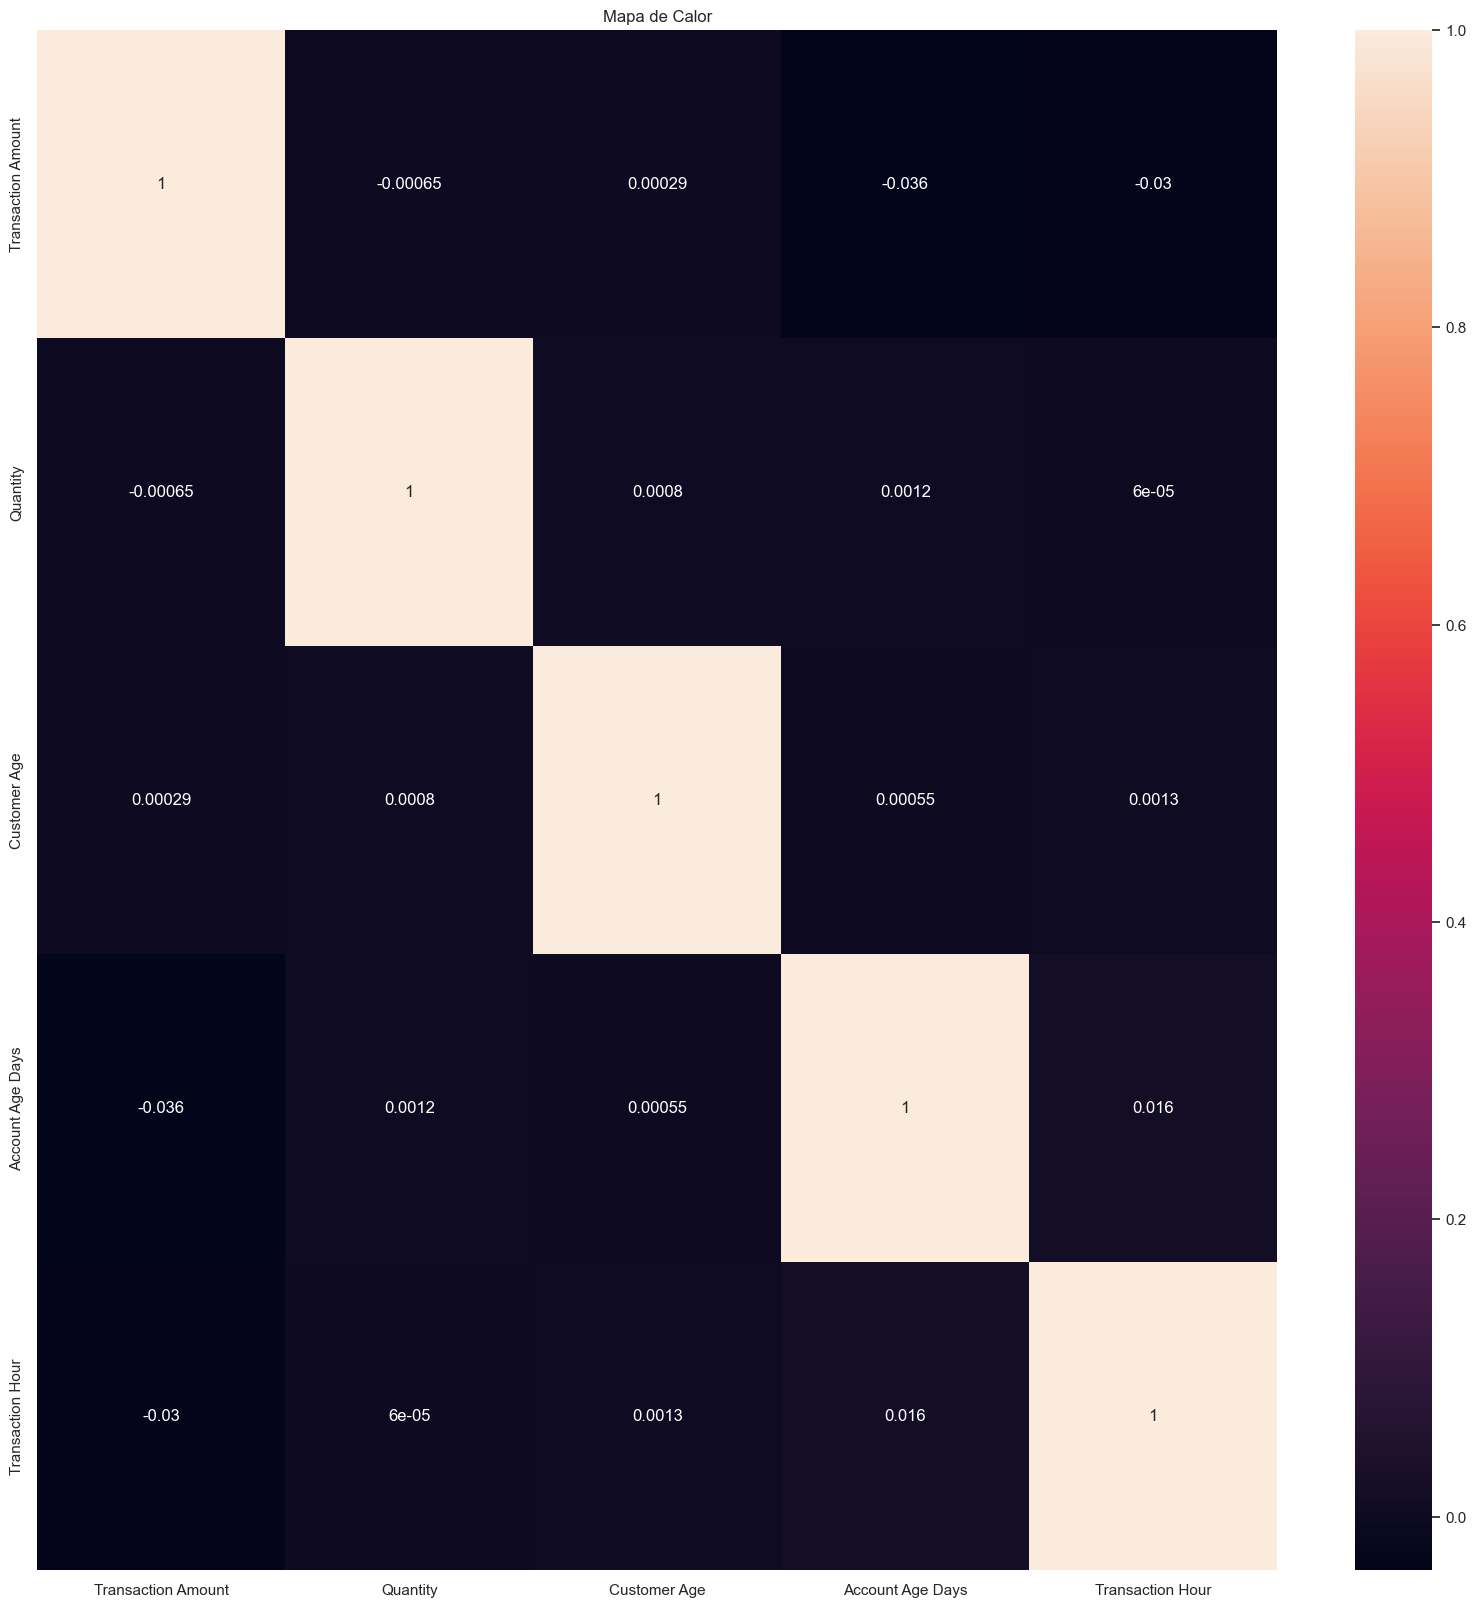

In [712]:
# Realizaremos un mapa de calor para ver la correlacion entre columnas o features

df2 = dataset.copy()
df2.drop(columns=["Transaction ID", "Customer ID", "Transaction Date", "Payment Method", "Product Category", "Customer Location", "Device Used", "Shipping Address", "Billing Address", "Is Fraudulent", "IP Address"], inplace=True)

plt.figure(figsize=(20, 20))
sbn.heatmap(df2.corr(), annot=True)

plt.title("Mapa de Calor")
plt.show()

In [713]:
dataset.groupby("Payment Method")["Transaction Amount"].mean()

Payment Method
PayPal           226.457966
bank transfer    226.673125
credit card      227.075179
debit card       226.866580
Name: Transaction Amount, dtype: float64

In [714]:
dataset.groupby("Payment Method")["Customer Age"].mean()

Payment Method
PayPal           34.527703
bank transfer    34.520015
credit card      34.502794
debit card       34.497829
Name: Customer Age, dtype: float64

In [715]:
dataset.groupby("Device Used")["Transaction Amount"].mean()

Device Used
desktop    226.667048
mobile     227.368321
tablet     226.268437
Name: Transaction Amount, dtype: float64

In [716]:
def generate_describe(column):

    count = dataset[column].count()
    std = dataset[column].std()
    max = dataset[column].max()
    mean = dataset[column].mean()
    min = dataset[column].min()
    median = dataset[column].median()
    quantile_25 = dataset[column].quantile(0.25)
    quantile_50 = dataset[column].quantile(0.5)
    quantile_75 = dataset[column].quantile(0.75)

    print(f"count: {count}\n" + f"std: {std}\n" + f"max: {max}\n" + f"mean: {mean}\n" + f"min: {min}\n" + f"median: {median}\n" + f"quantile_25: {quantile_25}\n" + f"quantile_50: {quantile_50}\n" + f"quantile_75: {quantile_75}\n")


In [717]:
generate_describe("Transaction Amount")

count: 1472952
std: 270.3950988679518
max: 12701.75
mean: 226.76830923886183
min: 10.0
median: 151.76
quantile_25: 68.61
quantile_50: 151.76
quantile_75: 296.05



In [718]:
generate_describe("Customer Age")

count: 1472952
std: 10.003134338650572
max: 86
mean: 34.5120811811926
min: -16
median: 35.0
quantile_25: 28.0
quantile_50: 35.0
quantile_75: 41.0



In [719]:
filtered = dataset[dataset["Customer Age"] <= 0]

count = filtered.shape[0]

print(count)

521


In [720]:
generate_describe("Quantity")

count: 1472952
std: 1.4147364737645765
max: 5
mean: 3.00023015006599
min: 1
median: 3.0
quantile_25: 2.0
quantile_50: 3.0
quantile_75: 4.0



In [721]:
generate_describe("Transaction Hour")

count: 1472952
std: 6.975995283914547
max: 23
mean: 11.28696386576073
min: 0
median: 11.0
quantile_25: 5.0
quantile_50: 11.0
quantile_75: 17.0



In [722]:
fraude = dataset[dataset["Is Fraudulent"] == 1]

print("total de registros fraudulentos: ", fraude.shape[0])

not_fraude = dataset[dataset["Is Fraudulent"] == 0]

print("total de registros no fraudulentos: ", not_fraude.shape[0])

total de registros fraudulentos:  73838
total de registros no fraudulentos:  1399114


C:\Users\felid\AppData\Local\Temp\ipykernel_5896\477441564.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataset["Customer Age"])


Text(0.5, 1.0, 'Distribución de las edades de los clientes')

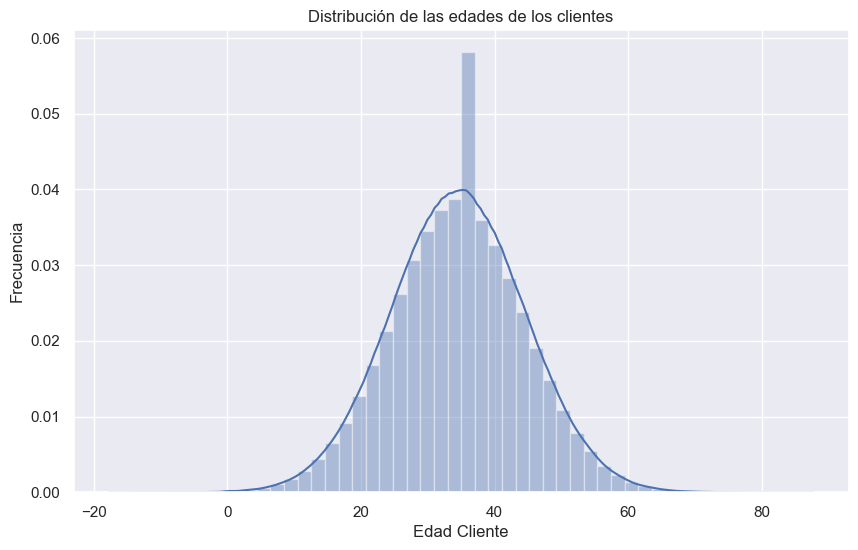

In [723]:
sbn.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 6))
sbn.distplot(dataset["Customer Age"])
ax.set(ylabel="Frecuencia", xlabel="Edad Cliente")
plt.title("Distribución de las edades de los clientes")

Text(0.5, 1.0, 'Distribución de valor de equipamiento al empezar un ronda por el valor del equipamiento de Team al empezar una ronda')

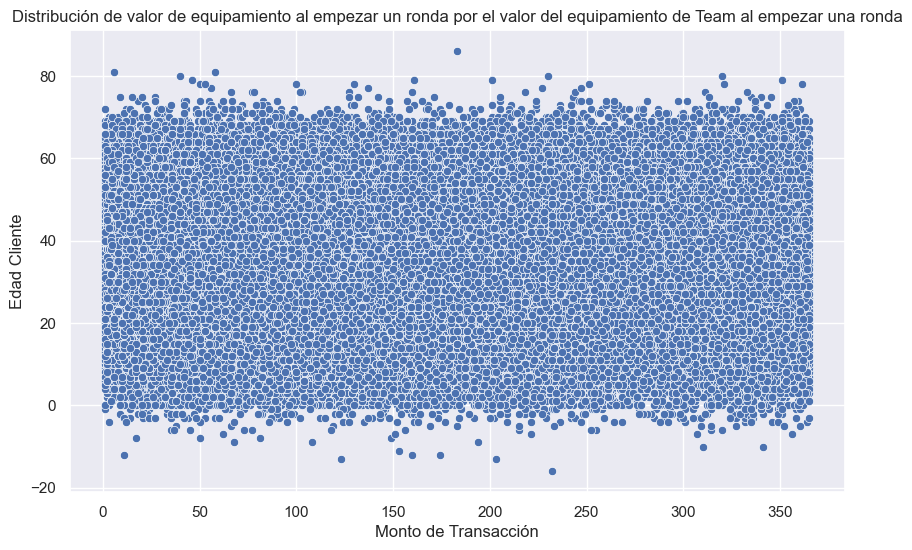

In [724]:
f, ax = plt.subplots(figsize=(10, 6))
sbn.scatterplot(x="Account Age Days", y="Customer Age",
                data=dataset)

ax.set(ylabel="Edad Cliente", xlabel="Monto de Transacción")
plt.title("Distribución de valor de equipamiento al empezar un ronda por el valor del equipamiento de Team al empezar una ronda")

Text(0.5, 1.0, 'Distribución de valor de equipamiento al empezar un ronda por el valor del equipamiento de Team al empezar una ronda')

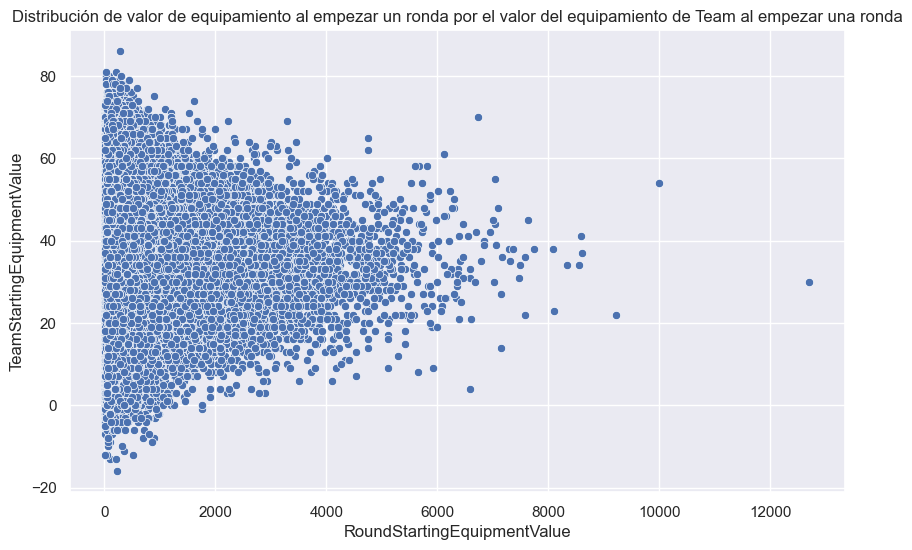

In [725]:
f, ax = plt.subplots(figsize=(10, 6))
sbn.scatterplot(x="Transaction Amount", y="Customer Age",
                data=dataset)

ax.set(ylabel="TeamStartingEquipmentValue", xlabel="RoundStartingEquipmentValue")
plt.title("Distribución de valor de equipamiento al empezar un ronda por el valor del equipamiento de Team al empezar una ronda")

In [726]:
dataset.groupby("Product Category")["Transaction Amount"].mean()

Product Category
clothing           226.192568
electronics        226.936801
health & beauty    226.891907
home & garden      227.200591
toys & games       226.619554
Name: Transaction Amount, dtype: float64

In [727]:
# Antigüedad Promedio de los Clientes: Número Promedio de Cuentas por Cliente:

# LIMPIEZA Y TRANSFORMACION DE LOS DATOS

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

columns_intereset = ["Transaction Amount", "Device Used", "Payment Method", "Quantity", "Customer Age", "Account Age Days", "Is Fraudulent", "Transaction Hour", "Product Category"]

dataset_training = dataset[columns_intereset].copy()

one_hot_encoder = OneHotEncoder(sparse_output=False)
label_encoder = LabelEncoder()

categorical_columns = dataset_training.select_dtypes(include=['object']).columns.tolist()

transform = one_hot_encoder.fit_transform(dataset_training[["Device Used"]])

one_hot_df = pd.DataFrame(transform, columns=one_hot_encoder.get_feature_names_out(["Device Used"]))

dataset_training = pd.concat([dataset_training, one_hot_df], axis=1)

dataset_training.drop(columns=["Device Used"], inplace=True)

dataset_training["Payment Method"] = label_encoder.fit_transform(dataset_training["Payment Method"])
dataset_training["Product Category"] = label_encoder.fit_transform(dataset_training["Product Category"])
dataset_training["Transaction Amount"] = StandardScaler().fit_transform(dataset_training["Transaction Amount"].values.reshape(-1, 1))
dataset_training["Account Age Days"] = StandardScaler().fit_transform(dataset_training["Account Age Days"].values.reshape(-1, 1))
# dataset_training["Customer Age"] = StandardScaler().fit_transform(dataset_training["Customer Age"].values.reshape(-1, 1))
# dataset_training["Transaction Hour"] = StandardScaler().fit_transform(dataset_training["Transaction Hour"].values.reshape(-1, 1))

dataset_training.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Transaction Amount   1472952 non-null  float64
 1   Payment Method       1472952 non-null  int32  
 2   Quantity             1472952 non-null  int64  
 3   Customer Age         1472952 non-null  int64  
 4   Account Age Days     1472952 non-null  float64
 5   Is Fraudulent        1472952 non-null  int64  
 6   Transaction Hour     1472952 non-null  int64  
 7   Product Category     1472952 non-null  int32  
 8   Device Used_desktop  1472952 non-null  float64
 9   Device Used_mobile   1472952 non-null  float64
 10  Device Used_tablet   1472952 non-null  float64
dtypes: float64(5), int32(2), int64(4)
memory usage: 112.4 MB


In [728]:
dataset_training.head(20)

,Transaction Amount,Payment Method,Quantity,Customer Age,Account Age Days,Is Fraudulent,Transaction Hour,Product Category,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,-0.623822,1,1,17,-1.400342,0,5,1,0.0,0.0,1.0
1,0.603531,3,2,40,-1.007320,0,8,1,1.0,0.0,0.0
2,-0.342382,0,2,22,-1.091539,0,3,3,0.0,0.0,1.0
3,-0.002213,1,5,31,-0.520721,0,20,0,1.0,0.0,0.0
4,-0.389202,1,2,51,-0.202560,0,5,0,0.0,0.0,1.0
5,-0.223223,1,2,34,-1.325481,0,10,4,0.0,0.0,1.0
6,-0.495158,0,2,14,-0.567509,0,19,4,0.0,0.0,1.0
7,0.337919,2,4,42,0.667704,0,13,2,1.0,0.0,0.0
8,-0.661433,1,4,38,0.096886,0,19,3,1.0,0.0,0.0
9,-0.388278,1,4,39,1.528609,0,21,2,0.0,1.0,0.0


In [729]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(dataset_training, test_size=0.2, random_state=42)

X_train = X_train[X_train["Is Fraudulent"] == 0]
X_train = X_train.drop(['Is Fraudulent'], axis=1)
X_train = X_train.values

Y_test = X_test["Is Fraudulent"]
X_test = X_test.drop(['Is Fraudulent'], axis=1)
X_test = X_test.values

print("Total transacciones entrenamiento: ", len(X_train))
print("Total transacciones prueba: ", len(X_test))

Total transacciones entrenamiento:  1119285
Total transacciones prueba:  294591


In [730]:
np.random.seed(5)

from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam, SGD

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

dim_entrada = X_train.shape[1]
capa_entrada = Input(shape=(dim_entrada,))

encoder = Dense(8, activation='tanh')(capa_entrada)
encoder = Dense(5, activation='relu')(encoder)
decoder = Dense(8, activation='tanh')(encoder)
decoder = Dense(10, activation='relu')(decoder)

auto_encoder = Model(inputs=capa_entrada, outputs=decoder)

auto_encoder.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

auto_encoder.summary()

c:\garden_tf_model\env\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 8)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271 (1.06 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

In [731]:
hist = auto_encoder.fit(X_train, X_train, epochs=30, batch_size=64, validation_data=(X_test, X_test), verbose=1).history

Epoch 1/30
17489/17489 ━━━━━━━━━━━━━━━━━━━━ 12s 657us/step - accuracy: 0.9538 - loss: 37.4591 - val_accuracy: 0.9949 - val_loss: 0.8210
Epoch 2/30
17489/17489 ━━━━━━━━━━━━━━━━━━━━ 11s 642us/step - accuracy: 0.9958 - loss: 0.7592 - val_accuracy: 0.9961 - val_loss: 0.6566
Epoch 3/30
17489/17489 ━━━━━━━━━━━━━━━━━━━━ 11s 639us/step - accuracy: 0.9966 - loss: 0.5657 - val_accuracy: 0.9988 - val_loss: 0.5983
Epoch 4/30
17489/17489 ━━━━━━━━━━━━━━━━━━━━ 11s 636us/step - accuracy: 0.9970 - loss: 0.5496 - val_accuracy: 0.9956 - val_loss: 0.5937
Epoch 5/30
17489/17489 ━━━━━━━━━━━━━━━━━━━━ 11s 640us/step - accuracy: 0.9971 - loss: 0.5124 - val_accuracy: 0.9975 - val_loss: 0.3984
Epoch 6/30
17489/17489 ━━━━━━━━━━━━━━━━━━━━ 11s 648us/step - accuracy: 0.9970 - loss: 0.3509 - val_accuracy: 0.9955 - val_loss: 0.3959
Epoch 7/30
17489/17489 ━━━━━━━━━━━━━━━━━━━━ 11s 644us/step - accuracy: 0.9968 - loss: 0.3489 - val_accuracy: 0.9954 - val_loss: 0.3968
Epoch 8/30
17489/17489 ━━━━━━━━━━━━━━━━━━━━ 11s 639us/

In [732]:
test_loss = auto_encoder.evaluate(X_test, Y_test, verbose=2)

9206/9206 - 4s - 395us/step - accuracy: 0.0000e+00 - loss: 148.3086


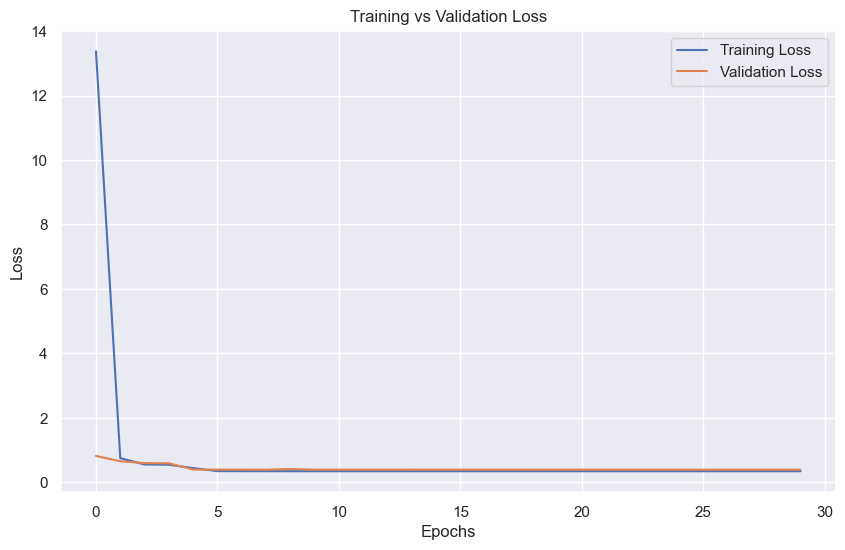

In [733]:
plt.figure(figsize=(10, 6))
plt.plot(hist['loss'], label='Training Loss')
plt.plot(hist['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [734]:
predictions = auto_encoder.predict(X_test)

mse = np.mean(np.power(X_test - predictions, 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': Y_test})

error_df

9206/9206 ━━━━━━━━━━━━━━━━━━━━ 4s 437us/step


,Reconstruction_error,True_class
71751,0.305512,0
139264,0.201905,0
380224,0.429456,0
95528,0.381163,0
1319338,0.498828,0
...,...,...
618318,0.513814,0
291946,0.148328,0
242132,0.253876,0
810023,0.575570,0


<Axes: xlabel='True_class', ylabel='Reconstruction_error'>

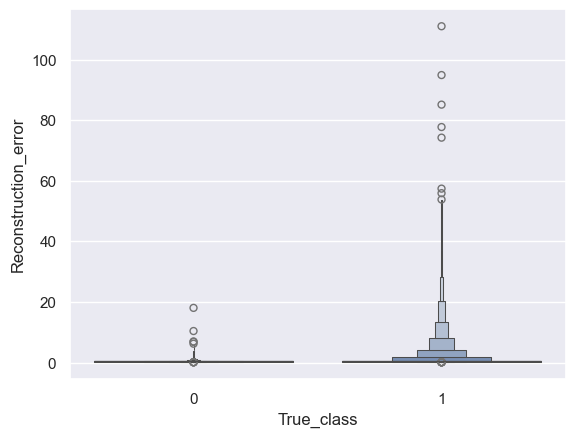

In [735]:
sbn.boxenplot(data=error_df, x='True_class', y='Reconstruction_error')

In [736]:
error_df.groupby('True_class').describe()

Reconstruction_error                                          \
                          count      mean       std       min       25%   
True_class                                                                
0                      279829.0  0.345058  0.201012  0.087098  0.207839   
1                       14762.0  1.308974  3.806300  0.087595  0.326207   

                                            
                 50%       75%         max  
True_class                                  
0           0.334446  0.425930   18.034559  
1           0.437846  0.617942  110.998195

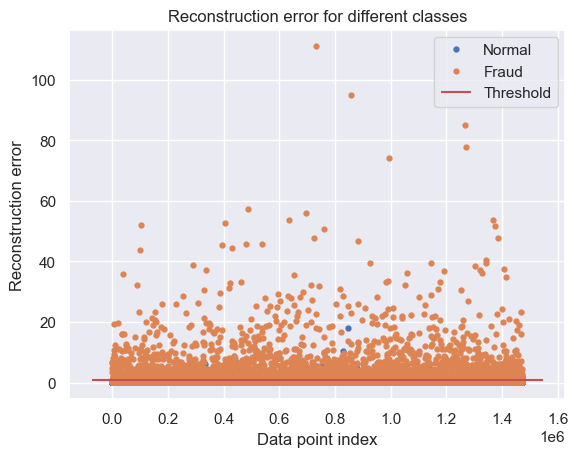

In [737]:
threshold = 0.8
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

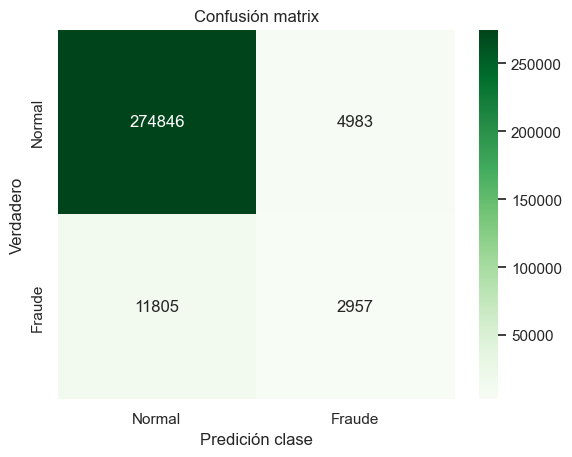

In [738]:
from sklearn.metrics import confusion_matrix, classification_report

LABELS = ['Normal', 'Fraude']
y_pred = [1 if e > threshold else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, y_pred)
sbn.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap='Greens');
plt.title("Confusión matrix")
plt.ylabel('Verdadero')
plt.xlabel('Predición clase')
plt.show()

In [739]:
print("TEST DATA")
print('*********')
print("Matriz Confusión  :")
print(confusion_matrix(error_df.True_class,y_pred))
print('______________________________________________________')
print("Reporte Clasificación  :")
print(classification_report(error_df.True_class,y_pred))

TEST DATA
*********
Matriz Confusión  :
[[274846   4983]
 [ 11805   2957]]
______________________________________________________
Reporte Clasificación  :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    279829
           1       0.37      0.20      0.26     14762

    accuracy                           0.94    294591
   macro avg       0.67      0.59      0.62    294591
weighted avg       0.93      0.94      0.93    294591



In [740]:
import joblib

filename = "fraud_detection_model.sav"
joblib.dump(auto_encoder, filename)

['fraud_detection_model.sav']